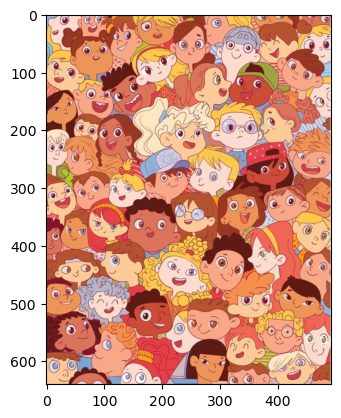

In [52]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2


image_folder = '/home/longvv/Image-Processing/Finding-Counting-ImageSet/Finding-Counting-ImageSet/Finding'
image_path = []

for i in range(1, 3):
    image_path.append(image_folder + '/cropped' + str(i) + '.jpg')

#we will use mpimg.imread here to use matplotlib, and instantly convert image to numpy form
image = mpimg.imread(image_path[0])
plt.imshow(image)

(57, 81, 3)


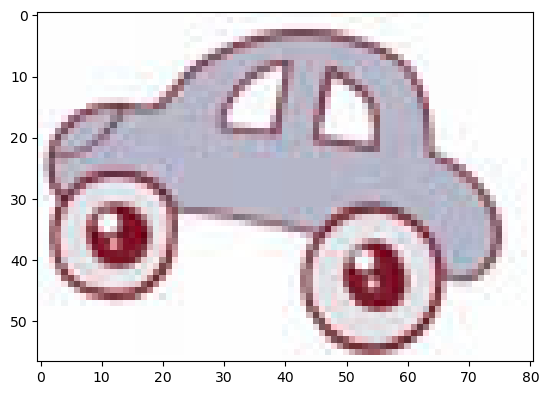

In [53]:
object = mpimg.imread('/home/longvv/Image-Processing/Finding-Counting-ImageSet/Finding-Counting-ImageSet/Finding/image1_object/1.jpg')
print(object.shape)
plt.imshow(object)

object_path = []
for i in range(1, 6):
    object_path.append(image_folder + '/image1_object/' + str(i) + '.jpg')

object_set = []
for i in object_path:
    object_set.append(mpimg.imread(i))

In [54]:
#standard attribute of an image
print(type(image))
print(image.shape)

<class 'numpy.ndarray'>
(640, 493, 3)


In [55]:
# alright i forgot to save my code so all the tried-and-error experiments is gone =(((
# but in short, cross-correlation doesnt work very well and require cubersome preparation
# from now on i will only demonstrate my best result

# the cross-correlation gove terrible result, now i will try euclid distance
# if some pixel is pure white (or semi-pure-white) => ignore

def euclid_distance(img1, img2):
    #print(img1.shape)
    #print(img2.shape)
    #assert(img1.shape == img2.shape)
    ans = 0
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            if (np.min(img1[i, j, :]) < 250):
                ans += np.sum((img1[i, j, :] - img2[i, j, :])**2)
    return ans

# we may need some rescale, let use cv2
# but to what scale ? Should we do it mannually ?
# or is there any auto method ?
# if we just naively take the euclid score among each scaled image 
# smaller image will always give smaller euclid distance => dead wrong
# ok so let try this, if the image is 2 times smaller => euclid will be x2
# it run a litte slow, so let add stride = 5

def rescaled_image_set(img, ratio):
    img_set = []
    for r in ratio:
        new_img_size = (int(img.shape[0] * r), int(img.shape[1] * r))
        new_img = cv2.resize(img, new_img_size)
        img_set.append(new_img)
    return img_set

def get_bounding_box(img, object):
    ratio = np.linspace(0.6, 0.9, 3)
    rescaled_imgs = rescaled_image_set(object, ratio)
    
    best_score = -1
    best_position = (0, 0)
    best_size = (0, 0)

    for r, rescaled_img in enumerate(rescaled_imgs):
        #print(f'checking for ratio : {ratio[r]}---------------------')

        num_position_checked = 1

        for i in range(0, img.shape[0] - rescaled_img.shape[0], 6):
            for j in range(0, img.shape[1] - rescaled_img.shape[1], 6):

                crop = img[i:i + rescaled_img.shape[0], j:j + rescaled_img.shape[1], :]
                euclid_dis =  euclid_distance(rescaled_img, crop) / (ratio[r]**2) 

                if (euclid_dis < best_score or best_score == -1):
                    best_score = euclid_dis
                    best_position = (i, j)
                    best_size = rescaled_img.shape[:3]
                
                num_position_checked += 1

    #print(best_score)
    #print(best_position, best_size)

    return (best_position, best_size)

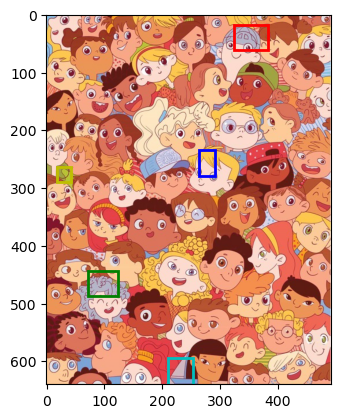

In [56]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg



def find_object(image, object_set):
    
    fig, ax = plt.subplots()
    ax.imshow(image)
    color = ['r', 'g', 'b', 'y', 'c']    
    for i, object in enumerate(object_set):
        bbox = get_bounding_box(image, object)
        bounding_box = patches.Rectangle((bbox[0][1],bbox[0][0]), bbox[1][0], bbox[1][1], linewidth=2, edgecolor=color[i], facecolor='none')
        ax.add_patch(bounding_box)
    
    plt.show()

find_object(image, object_set)